In [129]:
import re
import os
import math
import spacy
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI

In [130]:
# global variables
tf = {}
nlp = spacy.load('hin-dep-parser-treebank')
article = input("Enter the article name")

Enter the article name151722.txt


In [131]:
# extracting sentences from a given file
def getSent(articleName, directory):
    articleName = directory + '/' + articleName
    f = open(articleName).read()
    sentences = f.split('।')
    return sentences

In [132]:
# cleaning sentences (basic regex for now)
def cleanSent(unclean):
    clean = []
    for sent in unclean:
        sent = re.sub('\\n', '', sent)
        sent = re.sub('[a-zA-z]', '', sent)
        sent = sent.strip()
        if len(sent) != 0:
            clean.append(sent)
    return clean

In [133]:
# calculating tf of all words
def prepTF(clean, docs):
    global tf
    for sent in clean:
        doc = nlp(sent)
        for w in doc:
            if (w.lemma_, docs) in tf:
                tf[(w.lemma_, docs)] += 1
            else:
                tf[(w.lemma_, docs)] = 1
    return 

In [134]:
# repeating process for each article to get tf 
def eachArticle(directory):
    documents = os.listdir(directory)
    sorted(documents)
    x = 0
    for doc in documents:
        unclean = getSent(doc, directory)
        clean = cleanSent(unclean)
        if len(clean) > 50 and len(clean) < 70:
            x += 1
            print(doc + " " + str(x))
#             return
            prepTF(clean, doc)
    print(x)
    return

In [135]:
eachArticle('valid')

791


In [142]:
# calculating tfidf for a particular article
def oneArticle(articleName, directory):
    global tf
    df = {}
    unclean = getSent(articleName, directory)
    clean = cleanSent(unclean)
    documents = os.listdir(directory)    
    for sent in clean:
        doc = nlp(sent)
        for w in doc:
            if w.lemma_ in df:
                continue
            for docs in documents:
                if (w.lemma_, docs) in tf:
                    if w.lemma_ in df:
                        df[w.lemma_] += 1
                    else:
                        df[w.lemma_] = 1            
    idf = {}
    for word in df:
        if word not in idf:
            idf[word] = math.log(len(documents)/(df[word] + 1))
    
    tfidf = {}
    for word in idf:
        if word not in tfidf:
            tfidf[word] = tf[(word, articleName)] * idf[word]
    
    return tfidf

In [144]:
tfidf = oneArticle(article, 'valid')

In [ ]:
print(tfidf)

In [171]:
# final summary according to highest tfidf of sentences
def getSummary(articleName, directory, tfidf):
    unclean = getSent(articleName, directory)
    clean = cleanSent(unclean)
    heading = clean[0].split(' ')
    slicelen = slice(1, len(clean))
    text = clean[slicelen]
    size = round(0.3 * len(text))
    sent_tfidf = {}
    for sentI in range(0, len(text)):
        w1 = 0
        w2 = 0
        w3 = 0
        sent = text[sentI]
        doc = nlp(sent)
        stfidf = 0
        for w in doc:
            if w.lemma_ not in STOP_WORDS_HI:
                stfidf += tfidf[w.lemma_]
                if w.text in heading:
                    w1 += 5
                if w.tag_ == 'NNP':
                    w2 += 3
                if str(w.tag_)[0] == 'N':
                    w3 += 2
                    
        sent_tfidf[sentI] = stfidf/len(doc) + w1 + w2 + w3
    sent_tfidf = sorted(sent_tfidf.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
    sent_limit = []
    for i in range(0, size):
        sent_limit.append(sent_tfidf[i])
    sent_limit = sorted(sent_limit)
    print(sent_limit)
    summary = ""
    actual = ""
    for i in sent_limit:
        summary += text[i[0]] + " । " 
    for i in range(0, len(clean)):
        actual += clean[i] + " । "
    summary = clean[0] + " । " + summary
    return actual, summary

In [172]:
actual, summary = getSummary(article, 'valid', tfidf)
print(actual)
print("\n")
print(summary)

[(1, 64.23225866594636), (11, 57.269312041801015), (17, 83.35668097182631), (19, 91.36084504590292), (20, 84.60193871640452), (22, 59.25521470457296), (23, 65.2918909155979), (24, 68.14517695222872), (25, 50.17758317831556), (32, 57.299538992562596), (38, 63.6324152502019), (40, 91.53719080017467), (41, 51.94061650142831), (48, 104.52029635799879), (51, 112.94701791416651), (57, 60.72068823826992), (58, 53.65662672886014), (59, 78.67224244234511), (62, 64.63862027402052)]
बायना भारत के गाँवों में प्रचलित एक प्रथा है । एक घर में बने अथवा रिश्तेदारों के यहां से आए पकवानों को कई घरों में बांटने को बायना कहा जाता है । प्रकृति, पशु-पक्षी, रीति-रिवाज, जीवन मूल्य, पर्व-त्योहार और नाते-रिश्तों से हमारा विविध रूप रंग-रस व गंध का सरोकार रहता है । हमारी प्रकृति व संस्कृति परस्पर पूरक हैं, परस्पर निर्भरता ही ष्मा लगातार कम हो रही है । यह कमी कहीं न कहीं हमारे मन को कचोटती है । पहले पूरा गांव एक सूत्र में बंधा होता था । घरों के बीच आदान-प्रदान भी सामूहिकता के सूत्र ही होते थे । कृषि प्रधान समाज में

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

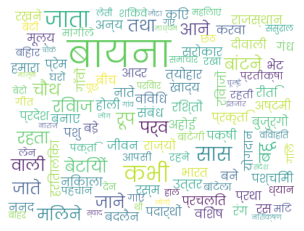

In [175]:
font= "Poppins-Light.ttf"
summary = re.sub("।", '', summary)
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    regexp=r"[\u0900-\u097F]+", 
    font_path=font
).generate(summary)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()